In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import math
from collections import Counter, OrderedDict
from scipy.stats import shapiro
from scipy.stats import ks_2samp
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
# df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
# df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
# df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [5]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [7]:
groupDf = df[['user_id', 'Toxicity']]

In [9]:
groupDf2 = groupDf[['user_id', 'Toxicity']].astype({'user_id': str})

In [10]:
# weekDf = groupDf2[groupDf2['week']=="01"]

In [11]:
groupedDf = groupDf2.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()
# groupedDf = weekDf.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [12]:
users_list = list(groupedDf['user_id'].unique().astype(str))

In [13]:
G2 = G.subgraph(users_list)

In [14]:
user_toxicity = groupedDf.set_index('user_id')['Toxicity'].to_dict()

In [15]:
neighbor_toxicity = {}
for user in G2.nodes():
  neighbors = list(G2.neighbors(user))
  if user in neighbors:
      neighbors.remove(user)
  if len(neighbors) > 0:
      neighbor_toxicity[user] = groupedDf[groupedDf['user_id'].isin(neighbors)]['Toxicity'].mean()

In [61]:
x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
y = list(neighbor_toxicity.values())

In [62]:
diff = [x[i] - y[i] for i in range(len(x))]
diff2 = diff
diff3 = diff

In [63]:
diff = [elem * 10 for elem in diff]

In [64]:
diff = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff]

In [65]:
diff = [elem / 10 for elem in diff]

In [66]:
len(diff)

59837

In [67]:
diff_counts = Counter(diff)

In [68]:
sum(diff_counts.values())

59837

In [69]:
diff_counts

Counter({0.1: 20331,
         -0.1: 36070,
         0.2: 2137,
         0.3: 289,
         -0.2: 918,
         0.4: 52,
         0.5: 6,
         0.7: 3,
         0.6: 5,
         -0.3: 21,
         0.8: 1,
         -0.4: 4})

In [70]:
sorted_counts = OrderedDict(sorted(diff_counts.items()))

In [71]:
sorted_counts

OrderedDict([(-0.4, 4),
             (-0.3, 21),
             (-0.2, 918),
             (-0.1, 36070),
             (0.1, 20331),
             (0.2, 2137),
             (0.3, 289),
             (0.4, 52),
             (0.5, 6),
             (0.6, 5),
             (0.7, 3),
             (0.8, 1)])

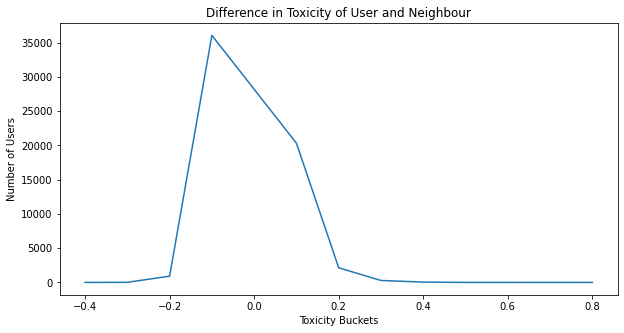

In [72]:
values = list(sorted_counts.keys())
counts = list(sorted_counts.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

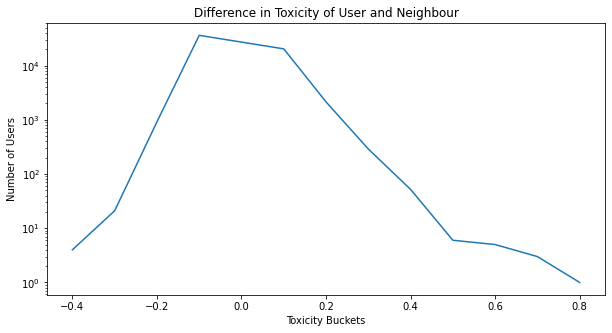

In [73]:
plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

In [74]:
diff2 = [elem * 100 for elem in diff2]

In [75]:
diff2 = [math.ceil(elem) if elem >= 0 else math.floor(elem) for elem in diff2]

In [76]:
diff2 = [elem / 100 for elem in diff2]

In [96]:
# diff2
print(max(diff2))
print(min(diff2))
print(max(diff3))
print(min(diff3))

0.72
-0.37
0.7109374893516603
-0.3684331612787879


In [78]:
diff2_counts = Counter(diff2)

In [79]:
sorted_counts2 = OrderedDict(sorted(diff2_counts.items()))

In [93]:
len(sorted_counts2)

84

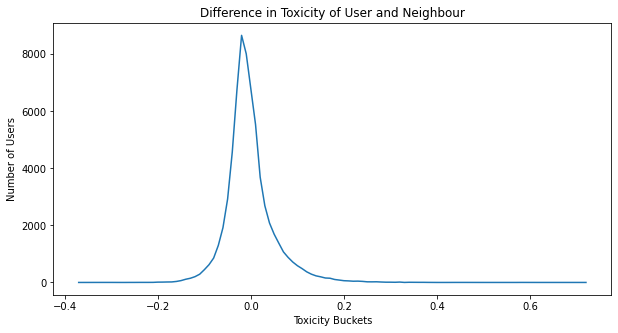

In [86]:
values = list(sorted_counts2.keys())
counts = list(sorted_counts2.values())

plt.figure(figsize=(10,5))
plt.plot(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

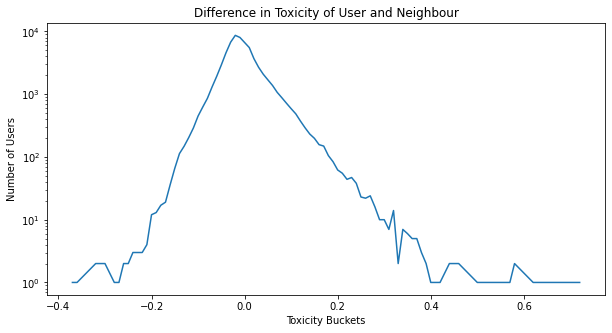

In [92]:
values = list(sorted_counts2.keys())
counts = list(sorted_counts2.values())

plt.figure(figsize=(10,5))
plt.semilogy(values, counts)
# plt.scatter(values, counts)
plt.xlabel('Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Difference in Toxicity of User and Neighbour')

# plt.xticks(range(len(values)), values)
plt.show()

In [87]:
stat, p = shapiro(diff2)

print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

Shapiro-Wilk test statistic: 0.9084965586662292
p-value: 0.0
The sample is not normally distributed


In [88]:
# Generate a sample with a normal distribution
sample = np.random.normal(loc=0.0, scale=1.0, size=100)

# Perform the KS test on the sample and the diff list
stat, p = ks_2samp(sample, diff2)

# Print the test statistic and the p-value
print("KS test statistic:", stat)
print("p-value:", p)

# Check if the null hypothesis can be rejected or not
if p > 0.05:
    print("The diff list comes from the same distribution as the sample")
else:
    print("The diff list comes from a different distribution than the sample")

KS test statistic: 0.5096490465765329
p-value: 1.3036158485241606e-24
The diff list comes from a different distribution than the sample


In [89]:
# Add a constant value to shift the data to a positive range
shifted_diff2 = np.array(diff2) - min(diff2) + 1e-8

# Apply Box-Cox transformation to shifted_diff2
diff2_boxcox, lambda_diff2 = stats.boxcox(shifted_diff2)

# Print lambda (the estimated power parameter)
print("Lambda for diff2: {:.2f}".format(lambda_diff2))

Lambda for diff2: 0.30


In [90]:
stat, p = shapiro(diff2_boxcox)

# Print the test statistic and the p-value
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Check if the null hypothesis can be rejected or not
if p > 0.05:
    print("The sample is normally distributed")
else:
    print("The sample is not normally distributed")

Shapiro-Wilk test statistic: 0.9356332421302795
p-value: 0.0
The sample is not normally distributed
